### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
churn_df = pd.read_csv('Group.csv')
churn_df.head()

,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,0,G1606,Female,Lancashire,0,1,0,20.0,NaN,2,0,Churn=No
1,1,F8889,Female,Essex,0,1,0,4.0,NaN,1,5,Churn=No
2,2,C5068,Female,Essex,0,Unknown,1,9.0,NaN,2,0,Churn=No
3,3,G9820,Male,West Yorkshire,1,1,1,9.0,NaN,4,9,Churn=No
4,4,H7261,Male,Greater Manchester,0,1,0,6.0,NaN,2,5,Churn=No


In [3]:
churn_df.shape

(7350, 12)

## Data Cleaning

In [4]:
## Here we find the total number of missing values in each column

churn_df.isnull().sum()

Unnamed: 0         0
customer_id        0
gender             0
location           0
partner            0
dependents         0
senior             0
Tenure             0
monthly_cost    7271
package            0
survey             0
Class             59
dtype: int64

#### Droping Irrelevant Column

In [5]:
churn_df.drop('customer_id', axis = 1, inplace = True)

In [6]:
churn_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
churn_df.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,Female,Lancashire,0,1,0,20.0,NaN,2,0,Churn=No
1,Female,Essex,0,1,0,4.0,NaN,1,5,Churn=No
2,Female,Essex,0,Unknown,1,9.0,NaN,2,0,Churn=No
3,Male,West Yorkshire,1,1,1,9.0,NaN,4,9,Churn=No
4,Male,Greater Manchester,0,1,0,6.0,NaN,2,5,Churn=No


Here we are going to fill the nan value in the "monthly_cost" with the monthly "packages"

In [8]:
churn_df.loc[churn_df['package'] == 1, 'monthly_cost'] = '£26'
churn_df.loc[churn_df['package'] == 2, 'monthly_cost'] = '£34'
churn_df.loc[churn_df['package'] == 3, 'monthly_cost'] = '£40'
churn_df.loc[churn_df['package'] == 4, 'monthly_cost'] = '£44'
churn_df

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,Female,Lancashire,0,1,0,20.0,£34,2,0,Churn=No
1,Female,Essex,0,1,0,4.0,£26,1,5,Churn=No
2,Female,Essex,0,Unknown,1,9.0,£34,2,0,Churn=No
3,Male,West Yorkshire,1,1,1,9.0,£44,4,9,Churn=No
4,Male,Greater Manchester,0,1,0,6.0,£34,2,5,Churn=No
...,...,...,...,...,...,...,...,...,...,...
7345,Male,Hertfordshire,1,1,0,14.0,£40,3,5,Churn=No
7346,Female,West Midlands,0,1,0,17.0,£40,3,6,Churn=No
7347,Male,Greater London,1,0,0,1.0,£44,4,1,Churn=Yes
7348,Male,Greater London,1,Unknown,1,13.0,£40,3,3,Churn=Yes


In [9]:
churn_df['monthly_cost']. unique()

array(['£34', '£26', '£44', '£40'], dtype=object)

Now let's convert the montly_cost from string to interger

In [10]:
# Now let's convert the montly_cost from string to interger

churn_df['monthly_cost'] = churn_df['monthly_cost'].str.replace('£', '').astype(int)

In [11]:
churn_df.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,Female,Lancashire,0,1,0,20.0,34,2,0,Churn=No
1,Female,Essex,0,1,0,4.0,26,1,5,Churn=No
2,Female,Essex,0,Unknown,1,9.0,34,2,0,Churn=No
3,Male,West Yorkshire,1,1,1,9.0,44,4,9,Churn=No
4,Male,Greater Manchester,0,1,0,6.0,34,2,5,Churn=No


In [12]:
churn_df['monthly_cost'].dtypes

dtype('int32')

Now let's calculate the 2% discount in the monthly_cost

In [13]:
# Now let's calculate the 2% discount in the monthly_cost

churn_df.loc[churn_df['Tenure'] <= 25, '2%_discount'] = churn_df['monthly_cost'] * 0.02

In [14]:
churn_df.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,2%_discount
0,Female,Lancashire,0,1,0,20.0,34,2,0,Churn=No,0.68
1,Female,Essex,0,1,0,4.0,26,1,5,Churn=No,0.52
2,Female,Essex,0,Unknown,1,9.0,34,2,0,Churn=No,0.68
3,Male,West Yorkshire,1,1,1,9.0,44,4,9,Churn=No,0.88
4,Male,Greater Manchester,0,1,0,6.0,34,2,5,Churn=No,0.68


In [15]:
churn_df['Class'].unique()

array(['Churn=No', 'Churn=Yes', nan, 'Y$e$s$$'], dtype=object)

Let's assume that "Y$e$s$$" is a typographical error meant for "churn = yes". 
Hence, let us replace it with yes

In [16]:
# Let's assume that "Y$e$s$$" was a typographical error meant for "churn = yes". 

churn_df['Class'].replace('Y$e$s$$', 'Yes', inplace = True)

In [17]:
churn_df['Class'].value_counts()

Churn=No     5184
Churn=Yes    2088
Yes            19
Name: Class, dtype: int64

In [18]:
churn_df['Class'].unique()

array(['Churn=No', 'Churn=Yes', nan, 'Yes'], dtype=object)

Now let's replace the nan value with the most predominate value (which is 'No')

In [19]:
churn_df['Class'].replace('nan', 'No', inplace = True)

In [20]:
churn_df['Class'].value_counts()

Churn=No     5184
Churn=Yes    2088
Yes            19
Name: Class, dtype: int64

In [21]:
# Let's replace all the "Churn=No" with "No" and also replacing "Churn=Yes" with "Yes"

churn_df['Class'].replace('Churn=No', 'No', inplace = True)
churn_df['Class'].replace('Churn=Yes', 'Yes', inplace = True)

#### Data Exploration on Univariate Analysis

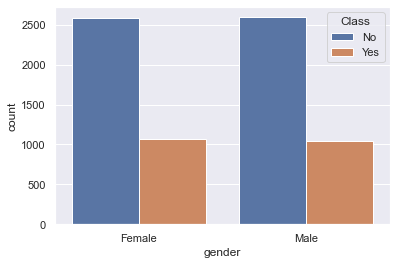

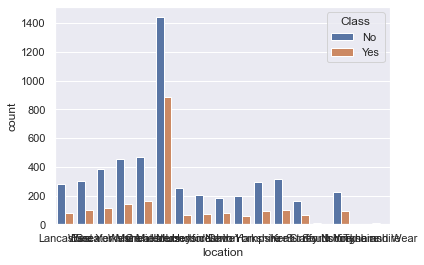

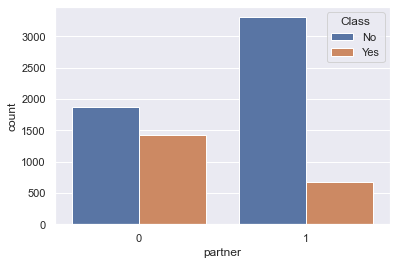

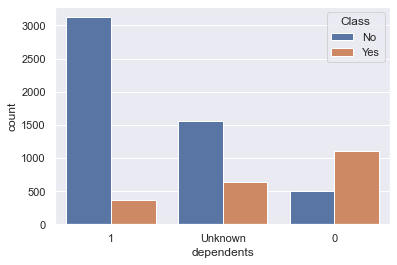

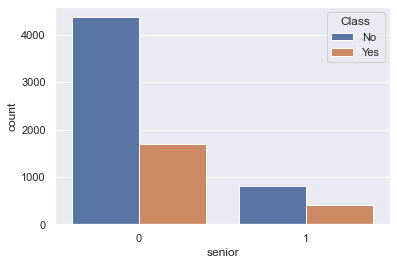

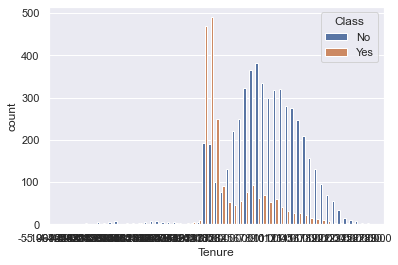

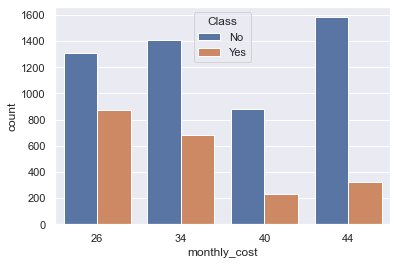

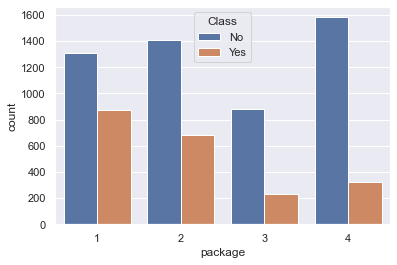

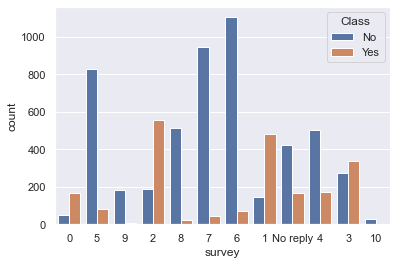

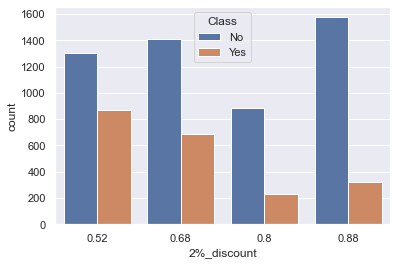

In [22]:
for i, predictor in enumerate(churn_df.drop(columns=['Class'])):
    plt.figure(i)
    sns.countplot(data=churn_df, x=predictor, hue='Class')

In [23]:
churn_df['dependents'].value_counts()

1          3531
Unknown    2208
0          1611
Name: dependents, dtype: int64

In [24]:
#Let's visualise the data to see the changes we have made

churn_df.head(20)

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,2%_discount
0,Female,Lancashire,0,1,0,20.0,34,2,0,No,0.68
1,Female,Essex,0,1,0,4.0,26,1,5,No,0.52
2,Female,Essex,0,Unknown,1,9.0,34,2,0,No,0.68
3,Male,West Yorkshire,1,1,1,9.0,44,4,9,No,0.88
4,Male,Greater Manchester,0,1,0,6.0,34,2,5,No,0.68
5,Male,Greater Manchester,1,0,0,1.0,34,2,2,Yes,0.68
6,Female,West Midlands,1,1,0,8.0,26,1,8,No,0.52
7,Female,Greater London,1,1,0,10.0,44,4,9,No,0.88
8,Female,Greater Manchester,1,1,0,22.0,44,4,8,No,0.88
9,Female,Merseyside,1,1,0,6.0,44,4,7,No,0.88


Let's replace all the "unknown" values in dependents column with nan

In [25]:
# Let's replace all the "unknown" values in dependents column with nan

churn_df['dependents'].replace('Unknown', np.nan, inplace = True)

In [26]:
# Let's replace all the "no reply" values in the survey column with nan

churn_df['survey'].replace('No reply', np.nan, inplace = True)

In [27]:
churn_df.isnull().sum()

gender             0
location           0
partner            0
dependents      2208
senior             0
Tenure             0
monthly_cost       0
package            0
survey           597
Class             59
2%_discount       19
dtype: int64

In [28]:
churn_df['dependents'].value_counts()

1    3531
0    1611
Name: dependents, dtype: int64

In [29]:
# To fill in the null values in "dependents column" let's fill the null with the predominant category in the dependents column

churn_df.fillna({'dependents': 1}, inplace = True)

In [30]:
churn_df.head()

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,2%_discount
0,Female,Lancashire,0,1,0,20.0,34,2,0,No,0.68
1,Female,Essex,0,1,0,4.0,26,1,5,No,0.52
2,Female,Essex,0,1,1,9.0,34,2,0,No,0.68
3,Male,West Yorkshire,1,1,1,9.0,44,4,9,No,0.88
4,Male,Greater Manchester,0,1,0,6.0,34,2,5,No,0.68


In [31]:
churn_df['survey'].value_counts()

6     1187
7     1003
5      921
2      742
4      676
1      628
3      617
8      541
0      217
9      192
10      29
Name: survey, dtype: int64

In [32]:
# To fill in the null values in "survey column" let's fill the null with the predominant category in the dependents column

churn_df.fillna({'survey': 1}, inplace = True)

In [33]:
churn_df.isnull().sum()

gender           0
location         0
partner          0
dependents       0
senior           0
Tenure           0
monthly_cost     0
package          0
survey           0
Class           59
2%_discount     19
dtype: int64

In the column called "Class" we have 59 rows with null values. this is an insignificant number so for this reason we drop the rows with null values in the Class column.


In [34]:
# In the column called "Class" we have 59 rows with null values. this is an insignificant number so for this reason we drop the rows with null values in the Class column

churn_df.dropna(subset = ['Class'], inplace = True)

In the column called "2%_ discount" we have 59 rows with null values. this is an insignificant number so for this reason we drop the rows with null values in the Class column.


In [35]:
churn_df.dropna(subset = ['2%_discount'], inplace = True)

 Let's review our data to see if we still have null values

In [36]:
# Let's review our data to see if we still have null values
churn_df.isnull().sum()

gender          0
location        0
partner         0
dependents      0
senior          0
Tenure          0
monthly_cost    0
package         0
survey          0
Class           0
2%_discount     0
dtype: int64

Now let's change the data type of "dependent" and "survey" from object to interger

In [37]:
churn_df.dtypes

gender           object
location         object
partner           int64
dependents       object
senior            int64
Tenure          float64
monthly_cost      int32
package           int64
survey           object
Class            object
2%_discount     float64
dtype: object

In [38]:
# Now let's change the data type of "dependent" and "survey" from object to interger

churn_df['dependents'] = churn_df['dependents'].astype(int)
churn_df['survey'] = churn_df['survey'].astype(int)

In [39]:
churn_df.location.value_counts()

Greater London        2323
West Midlands          627
Greater Manchester     590
West Yorkshire         496
Kent                   418
Essex                  404
Hampshire              389
Lancashire             355
Merseyside             315
South Yorkshire        314
Hertfordshire          272
Devon                  258
North Yorkshire        253
Surrey                 230
Tyne and Wear           13
Staffordshire            9
Nottinghamshire          6
Name: location, dtype: int64

In [40]:
churn_df.dtypes

gender           object
location         object
partner           int64
dependents        int32
senior            int64
Tenure          float64
monthly_cost      int32
package           int64
survey            int32
Class            object
2%_discount     float64
dtype: object

Convert the target variable 'Class' in a binary numeric variable i.e. Yes=1 ; No = 0

In [41]:
churn_df['Class'] = np.where(churn_df.Class == 'Yes',1,0)

In [42]:
churn_df['Class'].value_counts()

0    5167
1    2105
Name: Class, dtype: int64

In [43]:
churn_df.describe()

,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,2%_discount
count,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000,7272.000000
mean,0.546205,0.778878,0.168454,8.604897,35.135039,2.375688,4.394664,0.289466,0.702701
std,0.497895,0.415031,0.374295,6.255771,7.029609,1.163537,2.505264,0.453546,0.140592
min,0.000000,0.000000,0.000000,-5.196152,26.000000,1.000000,0.000000,0.000000,0.520000
25%,0.000000,1.000000,0.000000,3.000000,26.000000,1.000000,2.000000,0.000000,0.520000
50%,1.000000,1.000000,0.000000,9.000000,34.000000,2.000000,5.000000,0.000000,0.680000
75%,1.000000,1.000000,0.000000,13.000000,44.000000,4.000000,6.000000,1.000000,0.880000
max,1.000000,1.000000,1.000000,25.000000,44.000000,4.000000,10.000000,1.000000,0.880000


In [44]:
churn_df.corr()

,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,2%_discount
partner,1.000000,0.178568,-0.048044,0.181576,0.545243,0.543600,0.168960,-0.287931,0.545243
dependents,0.178568,1.000000,-0.154161,0.252133,0.094806,0.101420,0.254576,-0.464350,0.094806
senior,-0.048044,-0.154161,1.000000,-0.036362,-0.065361,-0.122283,-0.024268,0.044886,-0.065361
Tenure,0.181576,0.252133,-0.036362,1.000000,0.125201,0.122812,0.241841,-0.438047,0.125201
monthly_cost,0.545243,0.094806,-0.065361,0.125201,1.000000,0.989979,0.122862,-0.205733,1.000000
package,0.543600,0.101420,-0.122283,0.122812,0.989979,1.000000,0.123652,-0.205842,0.989979
survey,0.168960,0.254576,-0.024268,0.241841,0.122862,0.123652,1.000000,-0.529888,0.122862
Class,-0.287931,-0.464350,0.044886,-0.438047,-0.205733,-0.205842,-0.529888,1.000000,-0.205733
2%_discount,0.545243,0.094806,-0.065361,0.125201,1.000000,0.989979,0.122862,-0.205733,1.000000


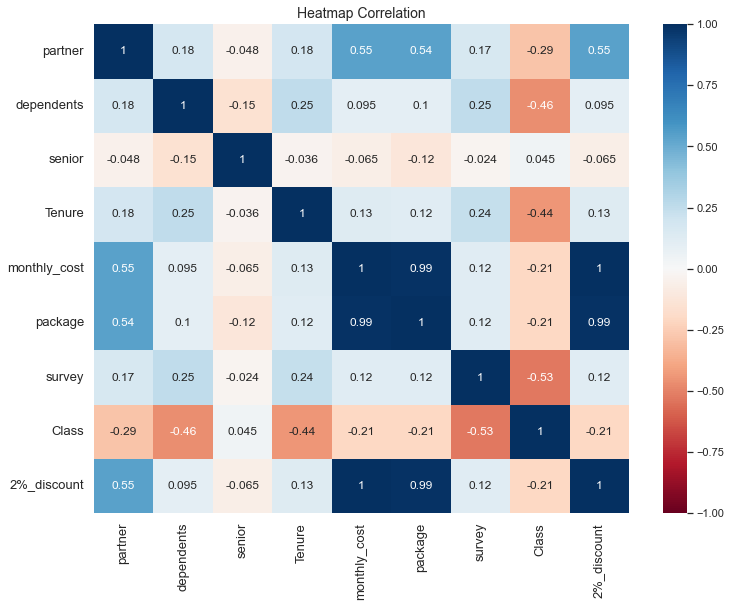

In [45]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(churn_df.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
plt.title('Heatmap Correlation', fontsize = 14)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 13)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 13)
plt.show()

In [46]:
churn_df['Class'].value_counts()

0    5167
1    2105
Name: Class, dtype: int64

Convert the variable feature 'gender' into a binary numeric variable i.e. Female=0 ; Male = 1

In [47]:
churn_df['gender'] = churn_df['gender'].map({'Female': 0, 'Male': 1})

In [48]:
churn_df

,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class,2%_discount
0,0,Lancashire,0,1,0,20.0,34,2,0,0,0.68
1,0,Essex,0,1,0,4.0,26,1,5,0,0.52
2,0,Essex,0,1,1,9.0,34,2,0,0,0.68
3,1,West Yorkshire,1,1,1,9.0,44,4,9,0,0.88
4,1,Greater Manchester,0,1,0,6.0,34,2,5,0,0.68
...,...,...,...,...,...,...,...,...,...,...,...
7345,1,Hertfordshire,1,1,0,14.0,40,3,5,0,0.80
7346,0,West Midlands,0,1,0,17.0,40,3,6,0,0.80
7347,1,Greater London,1,0,0,1.0,44,4,1,1,0.88
7348,1,Greater London,1,1,1,13.0,40,3,3,1,0.80


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

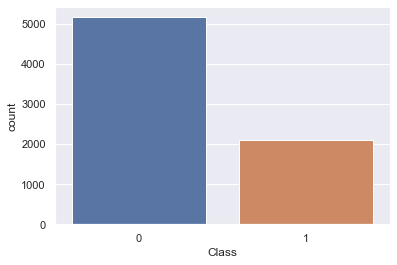

In [49]:
# Visualizing the ratio of leaving customers(churn) to current customers

sns.countplot(churn_df['Class'])

In [50]:
churn_df.drop('location', axis = 1, inplace = True)

##### Separating our dependent variable(features) from the independent variables(features) 

In [51]:
# Separating our dependent variable(features) from the independent variables(features) 

x = churn_df.drop('Class', axis = 1)
y = churn_df['Class']

#### Splitting the dataset into training and test set

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 42, stratify = y)

#### Feature Scaling

This is the process of transforming the features so that the values falls within thesame numerical range.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log = LogisticRegression()

In [59]:
log.fit(x_train, y_train)

LogisticRegression()

In [60]:
y_pred1 = log.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, y_pred1)

0.8707903780068729

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [64]:
precision_score(y_test, y_pred1)

0.804177545691906

In [65]:
recall_score(y_test, y_pred1)

0.7315914489311164

In [66]:
f1_score(y_test, y_pred1)

0.7661691542288558

### Support Vector Classifier (SVC)

In [67]:
from sklearn import svm

In [68]:
svm = svm.SVC()

In [69]:
svm.fit(x_train, y_train)

SVC()

Now let's perform a prediction

In [70]:
y_pred2 = svm.predict(x_test)

In [71]:
accuracy_score(y_test, y_pred2)

0.90446735395189

In [72]:
precision_score(y_test, y_pred2)

0.8810810810810811

### KNeighbors Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

Now let's perform a predicition

In [76]:
y_pred3 = knn.predict(x_test)

In [77]:
accuracy_score(y_test, y_pred3)

0.9079037800687285

In [78]:
precision_score(y_test, y_pred3)

0.8727272727272727

### Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
decision_tree = DecisionTreeClassifier()

In [81]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

Now let's perform Prediction

In [82]:
y_pred4 = decision_tree.predict(x_test)

In [83]:
accuracy_score(y_test, y_pred4)

0.8962199312714777

In [84]:
precision_score(y_test, y_pred4)

0.835820895522388

### Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier()

In [87]:
rf.fit(x_train, y_train)

RandomForestClassifier()

Now let's perform prediction 

In [88]:
y_pred5 = rf.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred5)

0.9017182130584193

In [90]:
precision_score(y_test, y_pred5)

0.8423645320197044

### Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gradient_bc = GradientBoostingClassifier()

In [93]:
gradient_bc.fit(x_train, y_train)

GradientBoostingClassifier()

Again let's perform prediction

In [94]:
y_pred6 = gradient_bc.predict(x_test)

In [95]:
accuracy_score(y_test, y_pred6)

0.9106529209621993

In [96]:
precision_score(y_test, y_pred6)

0.8740359897172236

### Selecting the best Model

In [97]:
final_accuracy_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'gradient_bc'],
                           'Accuracy': [accuracy_score(y_test, y_pred1),
                                        accuracy_score(y_test, y_pred2),
                                        accuracy_score(y_test, y_pred3),
                                        accuracy_score(y_test, y_pred4),
                                        accuracy_score(y_test, y_pred5),
                                        accuracy_score(y_test, y_pred6)]})

In [98]:
final_accuracy_data

,Models,Accuracy
0,LR,0.870790
1,SVC,0.904467
2,KNN,0.907904
3,DT,0.896220
4,RF,0.901718
5,gradient_bc,0.910653


Let's Visualize the model Accuracy

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

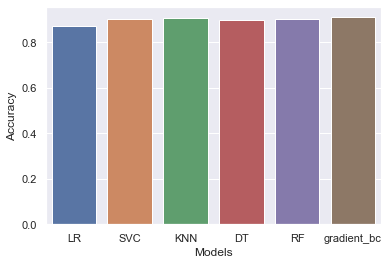

In [99]:
sns.barplot(final_accuracy_data['Models'], final_accuracy_data['Accuracy'])

In [100]:
final_precision_data = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'gradient_bc'],
                           'Precision':[precision_score(y_test, y_pred1),
                                        precision_score(y_test, y_pred2),
                                        precision_score(y_test, y_pred3),
                                        precision_score(y_test, y_pred4),
                                        precision_score(y_test, y_pred5),
                                        precision_score(y_test, y_pred6)]})

In [101]:
final_precision_data

,Models,Precision
0,LR,0.804178
1,SVC,0.881081
2,KNN,0.872727
3,DT,0.835821
4,RF,0.842365
5,gradient_bc,0.874036


Let's Visualize the model Accuracy

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Precision'>

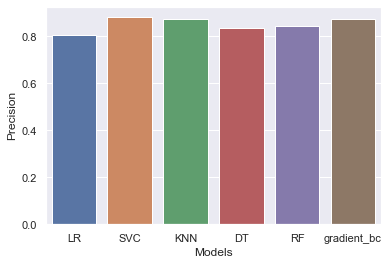

In [102]:
sns.barplot(final_precision_data['Models'], final_precision_data['Precision'])

### Now Let's save our Best Model

In [103]:
x_train = scaler.fit_transform(x_train)

In [104]:
gradient_bc.fit(x_train, y_train)

GradientBoostingClassifier()

In [105]:
import joblib

In [106]:
joblib.dump(gradient_bc, "Lu's Communication_Churn_Prediction")

["Lu's Communication_Churn_Prediction"]

### To run/use our model for business prediction

From our built model, we can see that we have a high precision and accuracy for the Support Vector Classifier model and the Gradient Boosting Classifier model.

However, I have chosen to run my prediction using the Gradient Boosting Classifier.

In [107]:
model = joblib.load("Lu's Communication_Churn_Prediction")

In [108]:
churn_df.columns

Index(['gender', 'partner', 'dependents', 'senior', 'Tenure', 'monthly_cost',
       'package', 'survey', 'Class', '2%_discount'],
      dtype='object')

Re-arranging the columns so that the "Class" column would be the last in the dataset

In [109]:
column_title = list(churn_df.columns)

In [110]:
column_title[8],column_title[9] = column_title[9],column_title[8]
column_title

['gender',
 'partner',
 'dependents',
 'senior',
 'Tenure',
 'monthly_cost',
 'package',
 'survey',
 '2%_discount',
 'Class']

In [111]:
model.predict([[1,0,1,1,7,34,3,5,0.68]])

array([0])

Remember in our prediction we called churn = 1(Lost customer to competitors) and churn = 0( i.e Customers are satisfied with your service and therefore will continue to petronize)